In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import json
import copy

In [2]:
%matplotlib inline

In [3]:
def gen_inputs_scan_beta(base_filepath, step, dest_dir):
    betas = np.arange(step, 180, step)
    betas_rad = betas / 180 * np.pi
    with open(base_filepath) as f:
        base_js = json.load(f)
    pattern = 'xtal_(a\d+b\d+g\d+)'
    pattern2 = 'b(\d+)'
    base_filename = os.path.basename(base_filepath)
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for beta, beta_rad in zip(betas, betas_rad):
        temp = copy.deepcopy(base_js)
        temp['settings']['eulers'][0]['beta'] = beta_rad
        euler_str = re.search(pattern, base_filename).group(1)
        beta_str = f'b{int(beta)}'
        new_euler_str = re.sub(pattern2, beta_str, euler_str)
        temp_filename = re.sub(pattern, f'xtal_{new_euler_str}', base_filename)
        dest_path = os.path.join(dest_dir, temp_filename)
        print(dest_path)
        with open(dest_path, 'w+') as out_fp:
            json.dump(temp, out_fp, indent=4)

In [5]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/dnpsoup_analytics'

In [160]:
gen_inputs_scan_beta(
    "inputs/CE/Hu_JCP_2008/H_orientations/seed_files/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b0g0_9p393T_inc40ns_fp.json",
    6,
    "inputs/CE/Hu_JCP_2008/H_orientations/case7/"
)

inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b6g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b12g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b18g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b24g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b30g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b36g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b42g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b48g0_9p393T_inc40ns_fp.json
inputs/CE/Hu_JCP_2008/H_orientations/case7/eeH_T1T2_adjusted_ee7p4A_a0b90g40_xtal_a0b54g0_9p393T_

### Single Crystals

#### e-e 13 Anstroms away

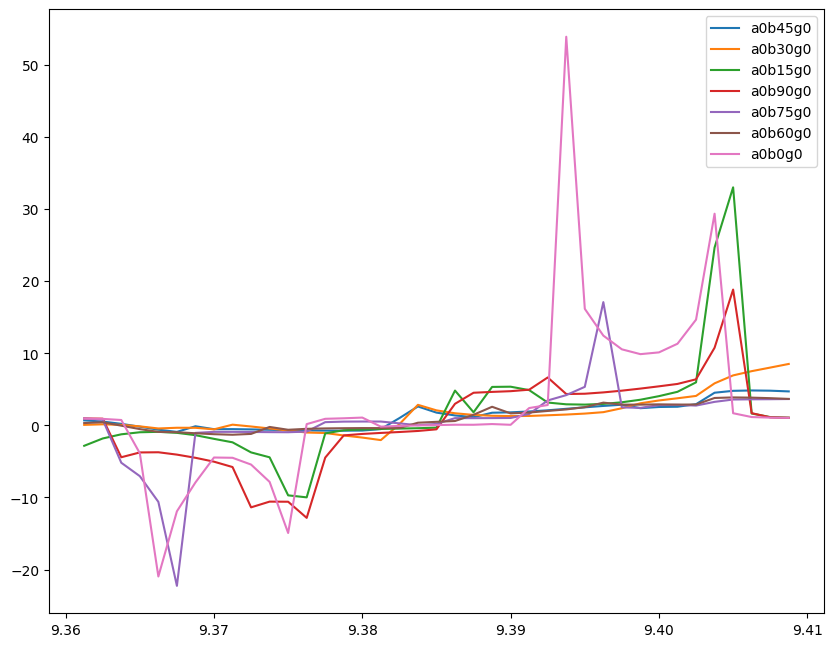

In [16]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/e-e13A/'

fig = plt.figure(figsize=(10, 8), dpi=100)
for filename in os.listdir(dir_name):
    filepath = os.path.join(dir_name, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    plt.plot(df[0], df[1], label=filename.split('_')[-4])
    
plt.legend()
plt.show()

#### e-e 8 Anstroms away

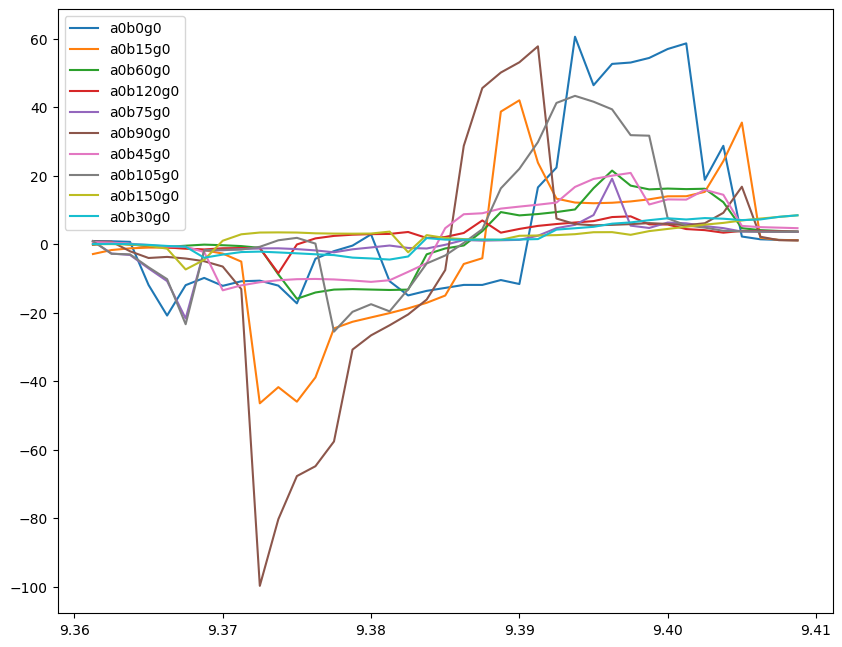

In [17]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/e-e8p2A/'

fig = plt.figure(figsize=(10, 8), dpi=100)
for filename in os.listdir(dir_name):
    filepath = os.path.join(dir_name, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    plt.plot(df[0], df[1], label=filename.split('_')[-4])
    
plt.legend()
plt.show()

#### e-e 8 Anstroms away   e-H 3 Anstroms away

In [30]:
pattern = 'xtal_a(\d+)b(\d+)g(\d+)'

29
Total data: 29


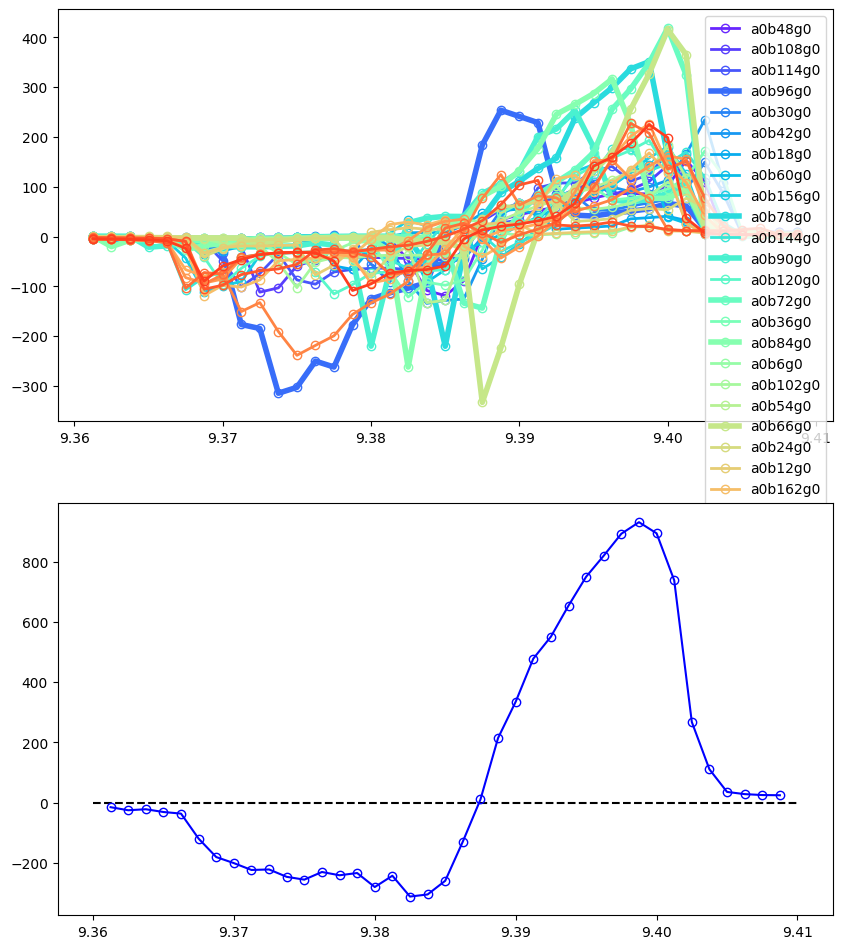

In [168]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/case7'
print(len(os.listdir(dir_name)))
n = len(list(os.listdir(dir_name)))
colors = plt.cm.rainbow(np.linspace(0.05, 0.95, n+1))
fig, axes = plt.subplots(2, 1, figsize=(10, 12), dpi=100)
df_sum = None
count = 0
for filename, color in zip(os.listdir(dir_name), colors):
    if not filename.endswith('result'):
        print(f'skip {filename}')
        continue
#     print(filename)
    filepath = os.path.join(dir_name, filename)
    if not os.path.exists(filepath):
        print(f'{filepath} not found')
        continue
    df = pd.read_csv(filepath, skiprows=2, header=None)
    label = filename.split('_')[-4]
    found = re.search(pattern, label)
    b = int(found.group(2))
    if df_sum is None:    
        df_sum = df
        df_sum[1] = df[1] * np.sin(np.pi * b / 180.0)
    else:
        df_sum[1] += df[1] * np.sin(np.pi * b / 180.0)
    linewidth=2
    if np.max(np.abs(df[1].values)) > 250:
        linewidth=4
    axes[0].plot(df[0], df[1], label=label,
                 marker='o', markerfacecolor='none', color=color, linewidth=linewidth)
    count += 1
    
print(f'Total data: {count}')

axes[1].plot(df_sum[0], df_sum[1]/(np.pi), 'bo-', markerfacecolor='none')
axes[1].hlines(0.0, 9.36, 9.41, linestyle='dashed')
    
axes[0].legend(loc='best')
plt.show()

In [169]:
def plot_fp(filepath):
    df = pd.read_csv(filepath, skiprows=2, header=None)
    fig = plt.figure()
    plt.plot(df[0], df[1])
    plt.show()

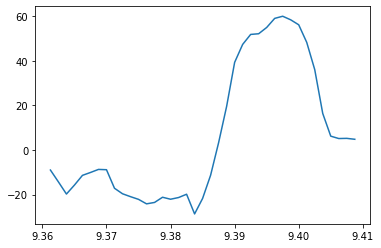

In [170]:
# plot field profile
data_dir = 'outputs/CE/Hu_JCP_2008/H_orientations'
filename = 'eeH_p3s_mas8kHz_inc40ns_zcw144_fp.result'
filepath = os.path.join(data_dir, filename)
plot_fp(filepath)

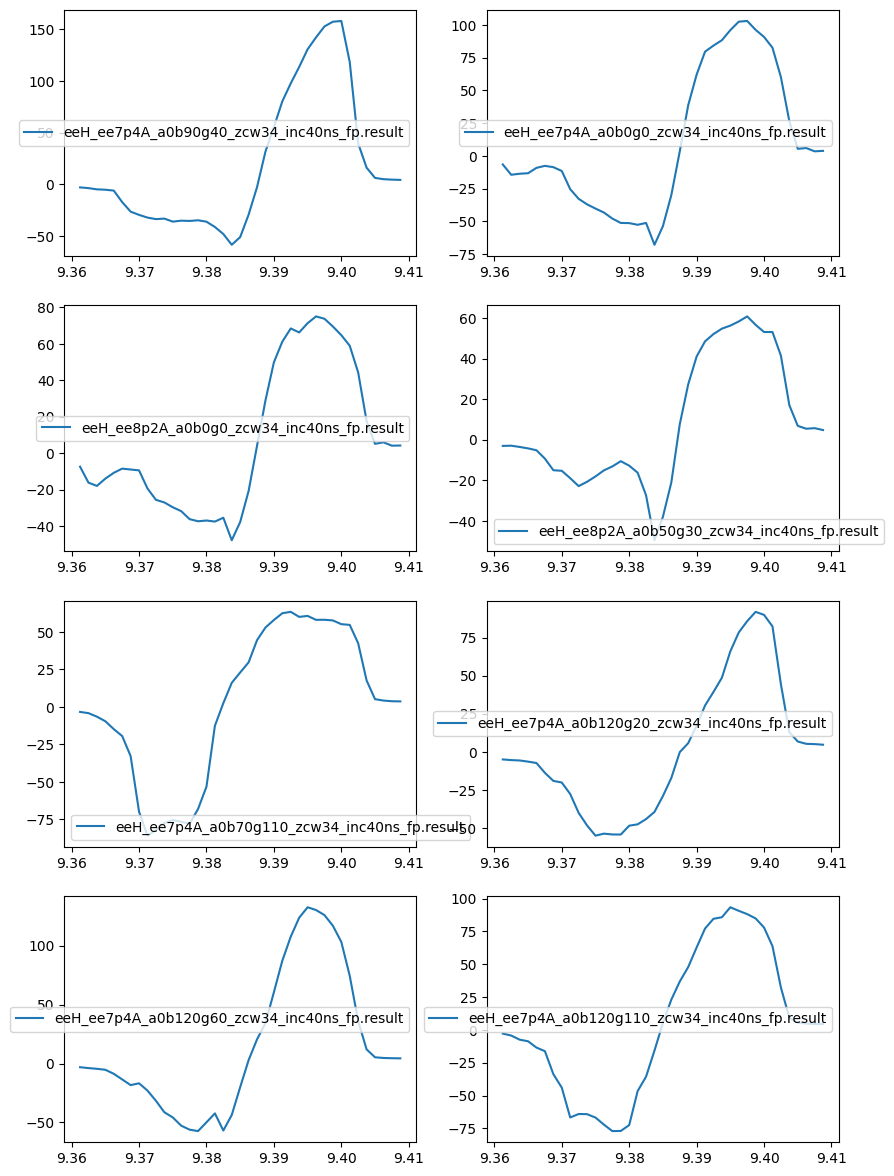

In [177]:
data_dir = 'outputs/CE/Hu_JCP_2008/H_orientations/seed_files'
filenames = [
    'eeH_ee7p4A_a0b90g40_zcw34_inc40ns_fp.result',
    'eeH_ee7p4A_a0b0g0_zcw34_inc40ns_fp.result',
    'eeH_ee8p2A_a0b0g0_zcw34_inc40ns_fp.result',
    'eeH_ee8p2A_a0b50g30_zcw34_inc40ns_fp.result',
    'eeH_ee7p4A_a0b70g110_zcw34_inc40ns_fp.result',
    'eeH_ee7p4A_a0b120g20_zcw34_inc40ns_fp.result',
    'eeH_ee7p4A_a0b120g60_zcw34_inc40ns_fp.result',
    'eeH_ee7p4A_a0b120g110_zcw34_inc40ns_fp.result'
]

fig, axes = plt.subplots(len(filenames)//2, 2, figsize=(10,15), dpi=100)
for i, filename in enumerate(filenames):
    filepath = os.path.join(data_dir, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    row = i//2
    col = i%2
    axes[row, col].plot(df[0], df[1], label=filename)
    axes[row, col].legend()
plt.show()


Total data: 8


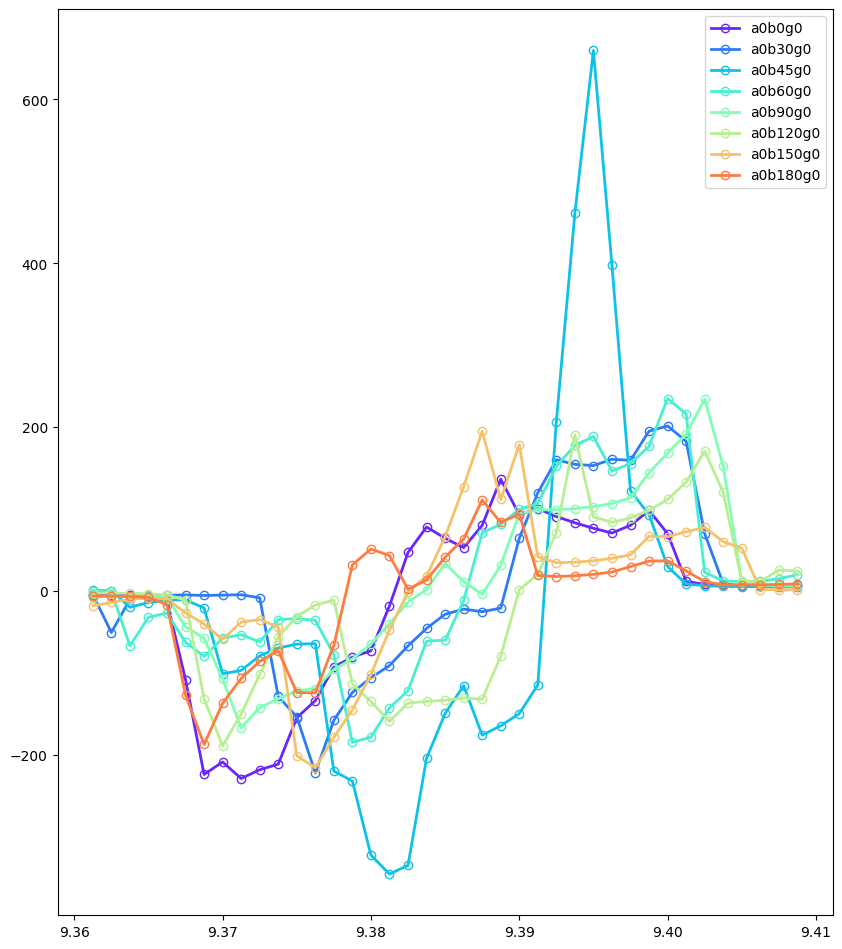

In [8]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/seed_files'
eulers = [
    'a0b0g0', 'a0b30g0', 'a0b45g0', 'a0b60g0', 'a0b90g0',
    'a0b120g0', 'a0b150g0', 'a0b180g0'
]
filenames = [
    f'eeH_ee7p5A_ee_tilt135_eH2p51A_10groups_p3s_{euler}_xtal_inc50ns_fp.result' for euler in eulers
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.05, 0.95, n+1))
fig, axes = plt.subplots(1, 1, figsize=(10, 12), dpi=100)
df_sum = None
count = 0
for filename, color, euler in zip(filenames, colors, eulers):
    if not filename.endswith('result'):
        print(f'skip {filename}')
        continue
#     print(filename)
    filepath = os.path.join(dir_name, filename)
    if not os.path.exists(filepath):
        print(f'{filepath} not found')
        continue
    df = pd.read_csv(filepath, skiprows=2, header=None)
    label = euler
    linewidth = 2
    axes.plot(df[0], df[1], label=label,
              marker='o', markerfacecolor='none', color=color, linewidth=linewidth)
    count += 1
    
print(f'Total data: {count}')

# axes[1].plot(df_sum[0], df_sum[1]/(np.pi), 'bo-', markerfacecolor='none')
# axes[1].hlines(0.0, 9.36, 9.41, linestyle='dashed')
    
axes.legend(loc='best')
plt.show()

In [4]:
def plot_fps(dir_name, eulers, filenames):
    n = len(filenames)
    colors = plt.cm.rainbow(np.linspace(0.03, 0.97, n))
    markers = ['o', 's', 'D', '^']
    fig, axes = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
    df_sum = None
    count = 0
    for filename, color, euler in zip(filenames, colors, eulers):
        if not filename.endswith('result'):
            print(f'skip {filename}')
            continue
    #     print(filename)
        filepath = os.path.join(dir_name, filename)
        if not os.path.exists(filepath):
            print(f'{filepath} not found')
            continue
        df = pd.read_csv(filepath, skiprows=2, header=None)
        label = euler
        linewidth = 2
        axes.plot(df[0], df[1], label=label,
                  marker=markers[count%len(markers)], markerfacecolor='none', color=color, linewidth=linewidth)
        count += 1

    print(f'Total data: {count}')

    # axes[1].plot(df_sum[0], df_sum[1]/(np.pi), 'bo-', markerfacecolor='none')
    # axes[1].hlines(0.0, 9.36, 9.41, linestyle='dashed')

    axes.legend(loc='best')
    plt.show()

Total data: 3


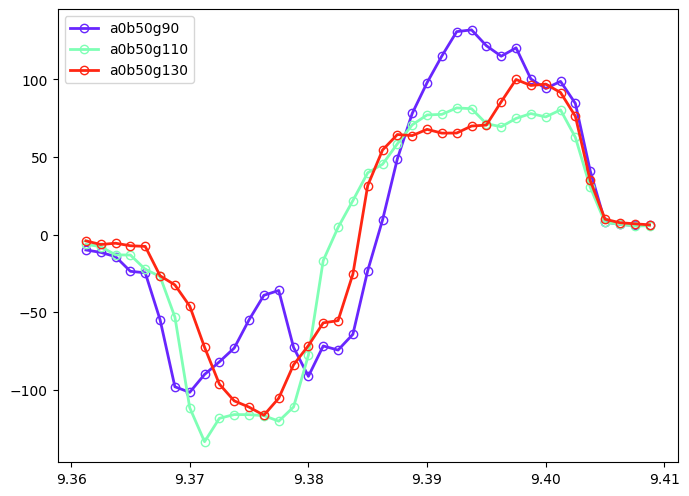

In [57]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/'
eulers = [
    'a0b50g90',
    'a0b50g110',
    'a0b50g130'
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

Total data: 6


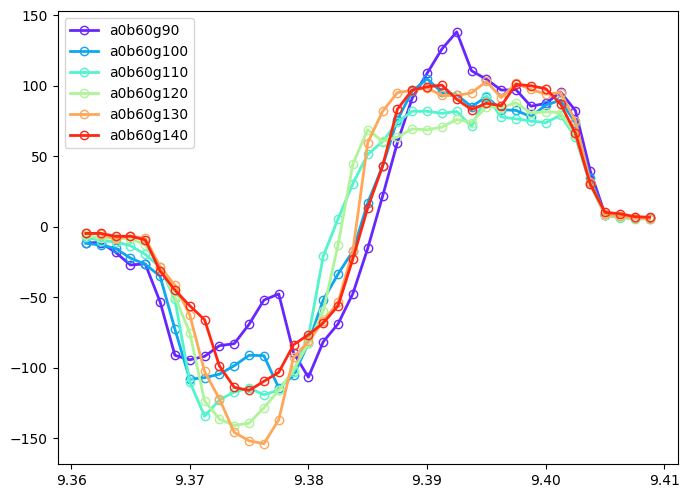

In [58]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/'
eulers = [
    'a0b60g90', 'a0b60g100', 'a0b60g110', 'a0b60g120', 'a0b60g130', 'a0b60g140'
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

Total data: 5


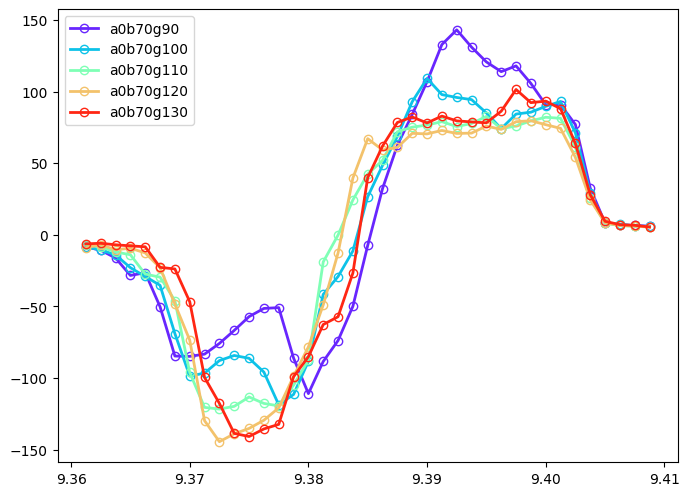

In [59]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/'
eulers = [
    'a0b70g90' ,'a0b70g100', 'a0b70g110', 'a0b70g120', 'a0b70g130'
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

Total data: 3


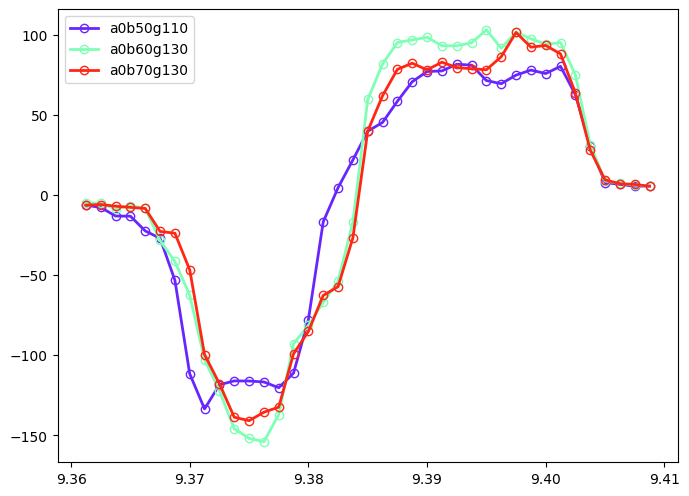

In [60]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/'
eulers = [
    'a0b50g110',
    'a0b60g130',
    'a0b70g130'
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/ee7p5A_eH_TEMPO_group1-2-8_p3_a0b10g140_zcw21_fp.result not found
outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/ee7p5A_eH_TEMPO_group1-2-8_p3_a0b20g140_zcw21_fp.result not found
outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/ee7p5A_eH_TEMPO_group1-2-8_p3_a0b30g140_zcw21_fp.result not found
outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/ee7p5A_eH_TEMPO_group1-2-8_p3_a0b40g140_zcw21_fp.result not found
Total data: 5


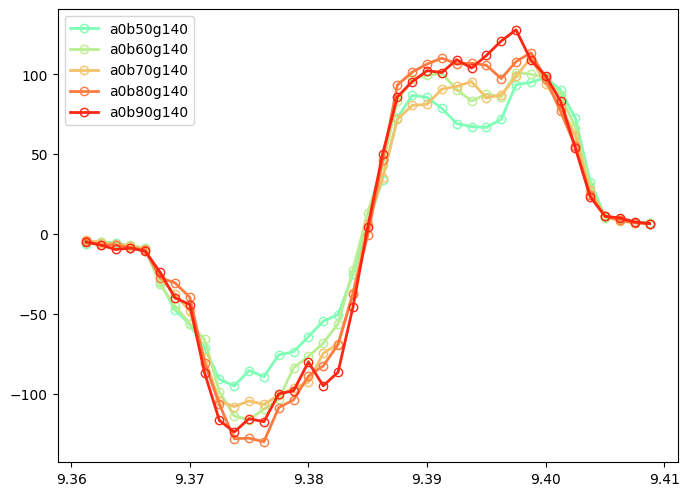

In [61]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/group1_2_8/'

g = '140'
bs = ['10', '20', '30', '40', '50', '60', '70', '80', '90']
eulers = [
    f'a0b{b_val}g{g}' for b_val in bs
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

Total data: 10


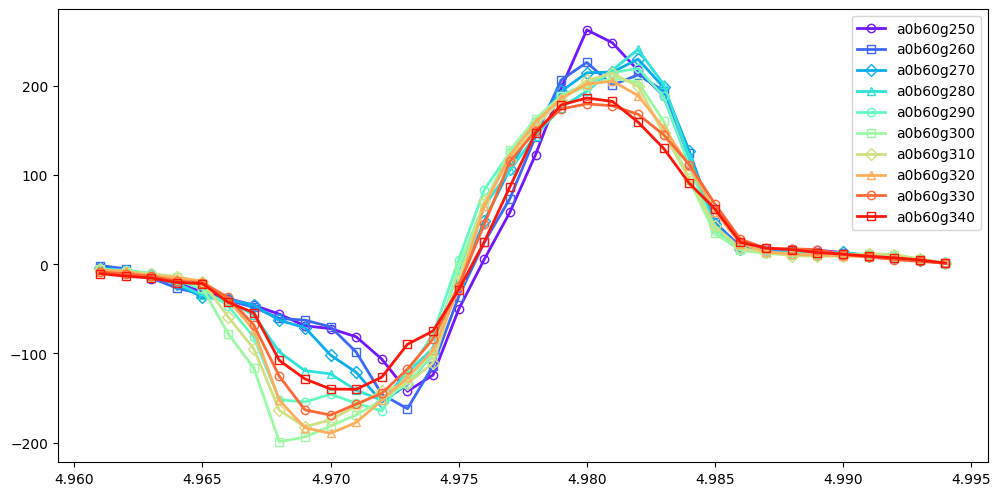

In [106]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/140GHz/'

b = '60'
gs = [str(i) + '0' for i in range(25, 35)]
eulers = [
    f'a0b{b}g{g_val}' for g_val in gs
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_140GHz_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

Total data: 7


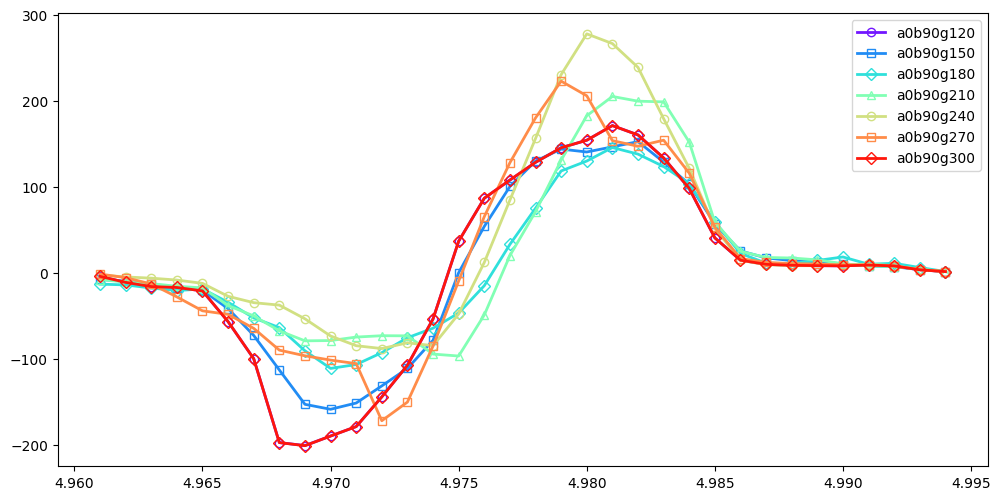

In [89]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/140GHz/'

b = '90'
gs = [str(i) + '0' for i in range(12, 33, 3)]
eulers = [
    f'a0b{b}g{g_val}' for g_val in gs
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_140GHz_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

Total data: 7


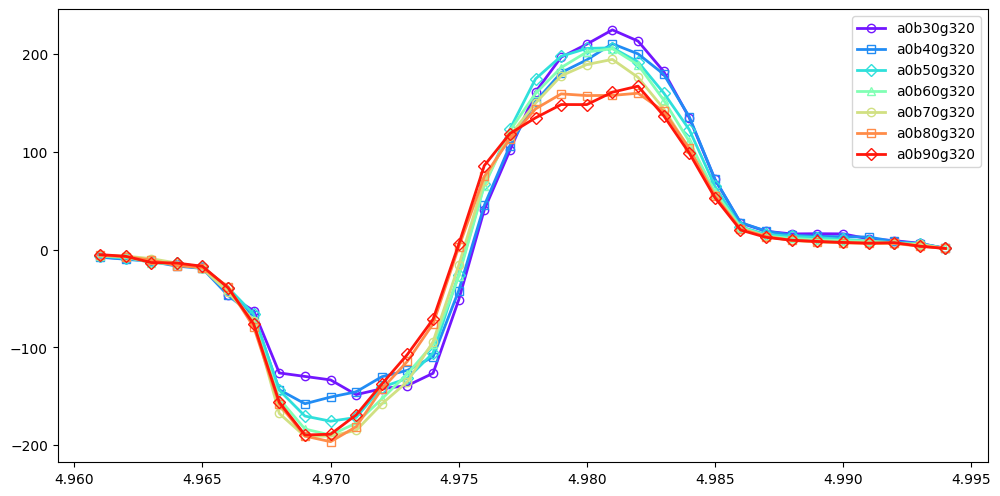

In [101]:
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/140GHz/'

g = '320'
bs = [str(i) + '0' for i in range(3, 10)]
eulers = [
    f'a0b{b_val}g{g}' for b_val in bs
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_{euler}_zcw21_140GHz_fp.result' for euler in eulers
]
plot_fps(dir_name, eulers, filenames)

Total data: 5


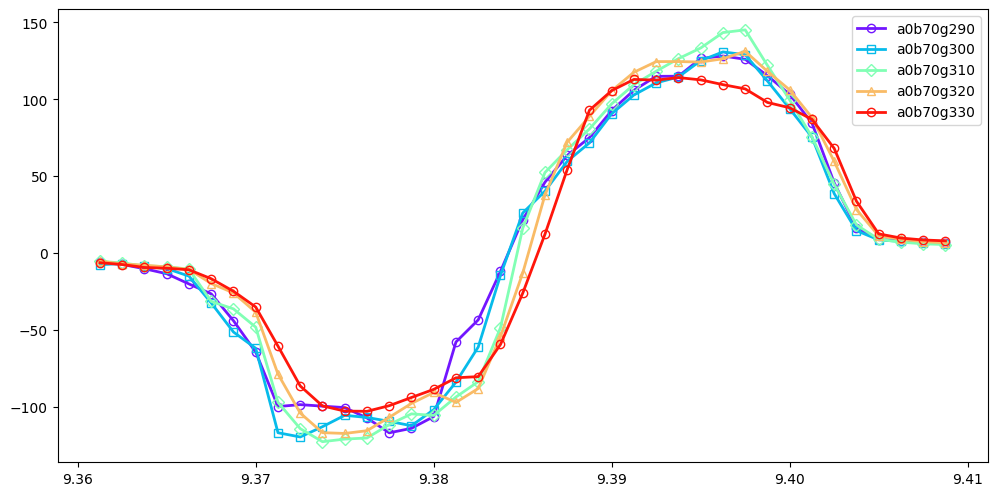

In [116]:
# 400 MHz
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/400MHz'

b = '70'
gs = [str(i) + '0' for i in range(29, 34, 1)]
eulers = [
    f'a0b{b}g{g_val}' for g_val in gs
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_263p45GHz_{euler}_zcw55_400MHz_fp.result' for euler in eulers
]

plot_fps(dir_name, eulers, filenames)

Total data: 3


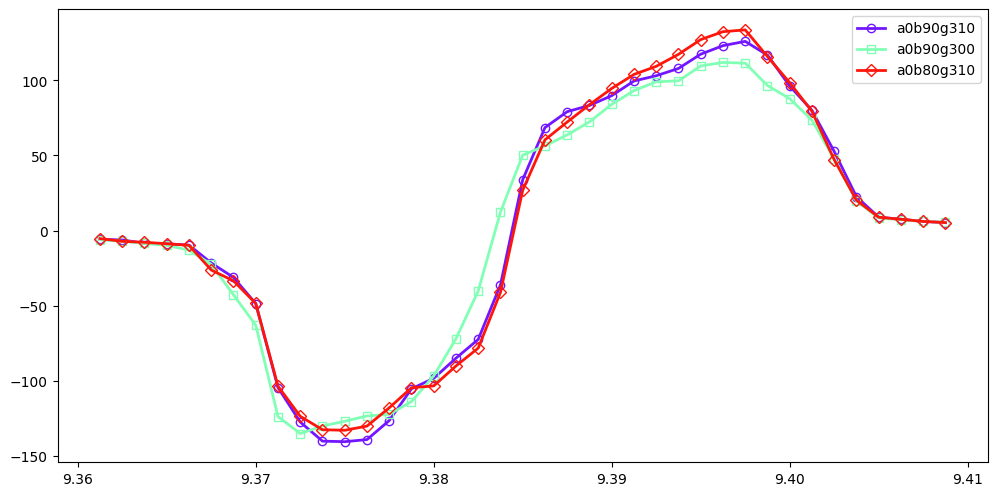

In [125]:
# 400 MHz
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/400MHz/batch2'

eulers = [
#     'a0b70g315',
    'a0b90g310',
    'a0b90g300',
#     'a0b90g150',
#     'a0b90g140',
#     'a0b90g130',
    'a0b80g310',
#     'a0b80g140',
#     'a0b70g305',  ##
#     'a0b60g310',
#     'a0b50g310',  ##
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_263p45GHz_{euler}_zcw55_400MHz_fp.result' for euler in eulers
]

plot_fps(dir_name, eulers, filenames)

Total data: 1


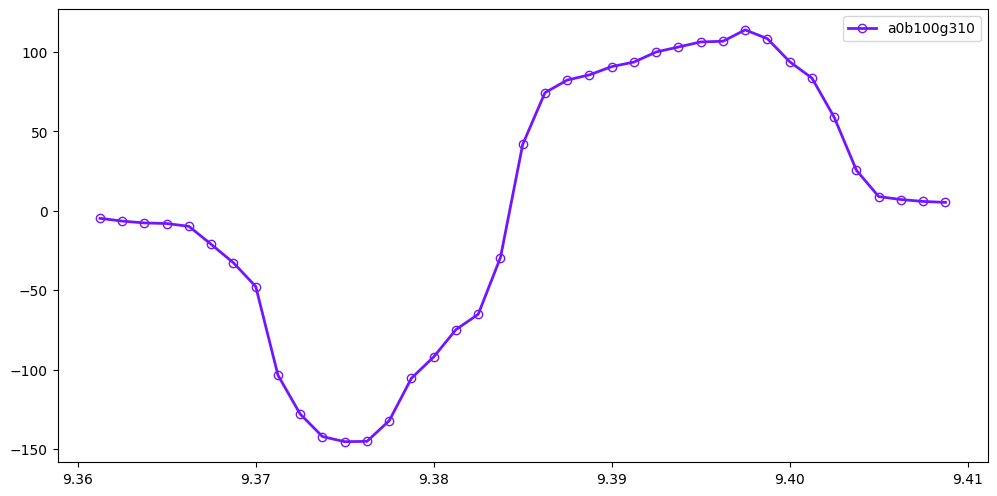

In [5]:
# 400 MHz
dir_name = 'outputs/CE/Hu_JCP_2008/H_orientations/eeH_cases/400MHz/batch3'

eulers = [
#     'a0b110g305',
    'a0b100g310',    # * Chosen Orientation *
#     'a0b100g305',
#     'a0b100g300',
#     'a0b90g305'
]
filenames = [
    f'ee7p5A_eH_TEMPO_group1-2-8_p3_263p45GHz_{euler}_zcw55_400MHz_fp.result' for euler in eulers
]

plot_fps(dir_name, eulers, filenames)